## Challenge 1: Creating a Visualization on Global Deforestation Patterns

### **Import Libraries**

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline

### **I. Loading and Exploring the Data**

In [3]:
temp_data = pd.read_csv("temperature_change_data_11-29-2021.csv")
temp_data.head()

,Domain Code,Domain,Area Code (ISO3),Area,Element Code,Element,Months Code,Months,Year Code,Year,Unit,Value,Flag,Flag Description
0,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1961,1961,°C,-0.751,Fc,Calculated data
1,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1962,1962,°C,0.985,Fc,Calculated data
2,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1963,1963,°C,1.931,Fc,Calculated data
3,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1964,1964,°C,-2.056,Fc,Calculated data
4,ET,Temperature change,AFG,Afghanistan,7271,Temperature change,7016,Dec–Jan–Feb,1965,1965,°C,-0.669,Fc,Calculated data


In [4]:
temp_data.columns

Index(['Domain Code', 'Domain', 'Area Code (ISO3)', 'Area', 'Element Code',
       'Element', 'Months Code', 'Months', 'Year Code', 'Year', 'Unit',
       'Value', 'Flag', 'Flag Description'],
      dtype='object')

### **II. Filtering the Data**

In [73]:
# Choosing only countries that have data for each meteorological year
countries_to_analyze = set()

for country in temp_data['Area'].unique():
    if len(temp_data.loc[(temp_data['Area'] == country) & (temp_data['Months'] == 'Meteorological year')]['Year'].unique()) == temp_data['Year'].max() - temp_data['Year'].min() + 1:
        countries_to_analyze.add(country)

print(countries_to_analyze)

{'Chad', 'Malaysia', 'Niger', 'Seychelles', 'United States of America', 'China, Taiwan Province of', 'Cambodia', 'El Salvador', 'Zambia', 'American Samoa', 'Holy See', 'Brunei Darussalam', 'Namibia', 'Yemen', 'Guyana', 'Gambia', 'Panama', 'Sri Lanka', 'Madagascar', 'Gabon', 'Suriname', 'Grenada', 'Denmark', 'Poland', 'Cabo Verde', 'Mayotte', 'Trinidad and Tobago', 'Germany', 'Sweden', 'Switzerland', 'Finland', 'Niue', 'Morocco', 'Pitcairn', 'New Zealand', 'Puerto Rico', 'Saint Pierre and Miquelon', 'Saint Helena, Ascension and Tristan da Cunha', 'Bulgaria', 'Jamaica', 'Portugal', 'Samoa', 'Syrian Arab Republic', 'Cook Islands', 'Burkina Faso', 'Chile', 'Western Sahara', 'Ecuador', 'China, Hong Kong SAR', 'Malta', 'Albania', 'Angola', 'Antarctica', 'Pakistan', 'Egypt', 'Senegal', 'Tokelau', 'Antigua and Barbuda', 'Nicaragua', 'Saint Lucia', 'Mongolia', 'Cuba', 'Wake Island', 'Timor-Leste', 'Haiti', 'Brazil', 'Sierra Leone', 'Sao Tome and Principe', 'Mozambique', 'Nepal', 'Tonga', 'Falkl

In [6]:
# From the available countries, we will select a few to visualize
visualization_countries = ['United States of America', 'China', 'Republic of Korea', 'Canada', 'Finland']

### **III. Creating Visualizations**

#### **i. Bar Chart**

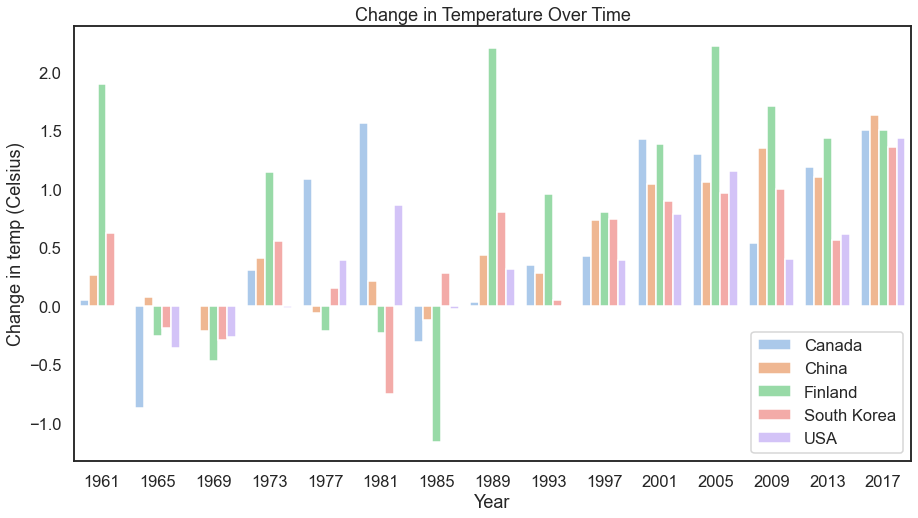

In [80]:
# Choosing rows that display meteorological year data for the selected countries
df = temp_data.loc[(temp_data['Year'].isin(range(1961, 2021, 4))) & (temp_data['Months'] == 'Meteorological year')]
df = df.loc[df['Area'].isin(visualization_countries)]

# Renaming long country names
df['Area'].replace({'Republic of Korea':'South Korea', 'United States of America':'USA'}, inplace = True)

# Creating the chart
ax = sns.barplot(data = df, x = 'Year', y = 'Value', hue = 'Area', palette = 'pastel')
sns.set(rc = {'figure.figsize': (15,8)})
sns.set_theme(style = 'white', context = 'talk')
plt.legend(loc = 'lower right')
ax.set(xlabel = 'Year', ylabel = 'Change in temp (Celsius)', title = 'Change in Temperature Over Time')
print()

#### **ii. Linear Regression Plot**

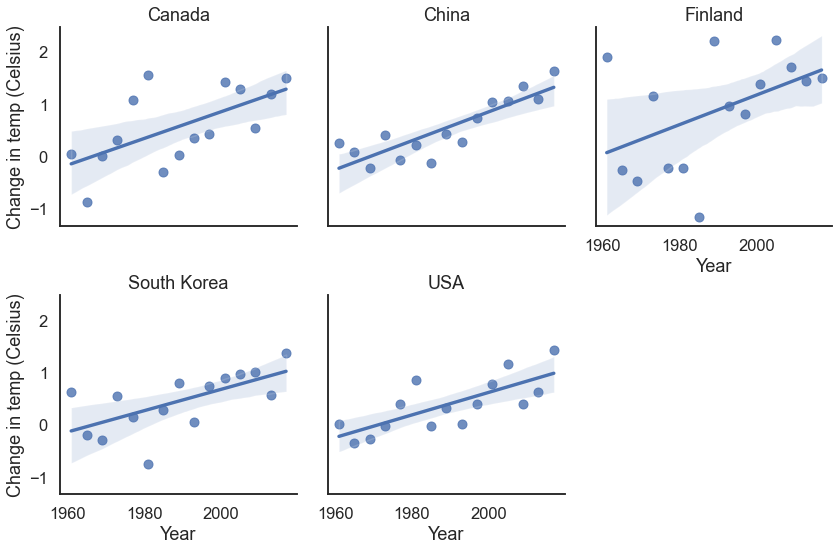

In [81]:
grid = sns.FacetGrid(data = df, col = 'Area', col_wrap = 3, height = 4)
grid.map(sns.regplot, 'Year', 'Value')

# Setting titles and labels for each plot
for ax, title in zip(grid.axes.flat, ['Canada', 'China', 'Finland', 'South Korea', 'USA']):
    ax.set_title(title)
    ax.set_ylabel("Change in temp (Celsius)")

#### **iii. Box Plot**

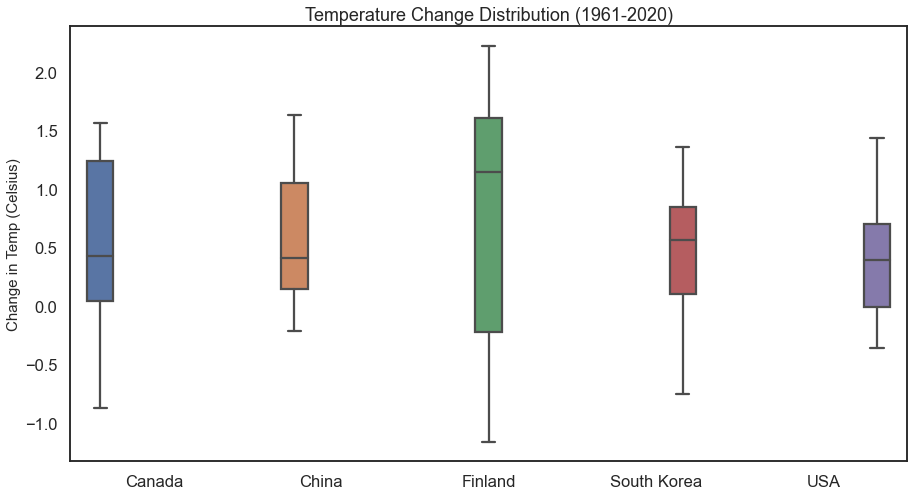

In [82]:
bp = sns.boxplot(data = df, x = 'Area', y = 'Value', hue = 'Area')

# Setting title and labels
plt.xlabel('', fontsize = 18)
plt.title('Temperature Change Distribution (1961-2020)')
plt.ylabel('Change in Temp (Celsius)', fontsize = 15)
plt.legend([],[], frameon = False)
print()